### Which Employee Will Leave ?

In [1]:
import pandas as pd
%matplotlib inline
import seaborn  as sns
from matplotlib import  pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()#left is the feature we need to predict

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
train.describe(include=['object'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


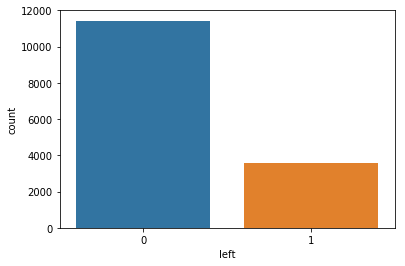

In [6]:
sns.countplot(train.left)

'left' class is not evenly distributed,so we have to see f1-score also .

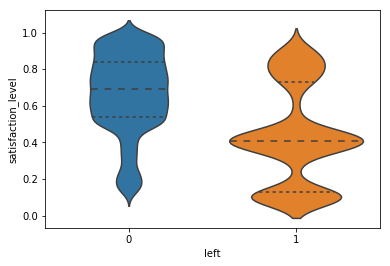

In [7]:
sns.violinplot(x='left',y='satisfaction_level',data=train,inner='quartile')

'satisfaction_level' seems to be important feature in determinig 'left'

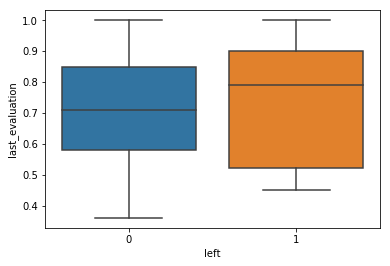

In [8]:
sns.boxplot(train.left,train.last_evaluation)

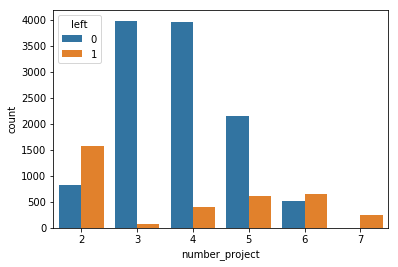

In [9]:
sns.countplot(train.number_project,hue=train.left)

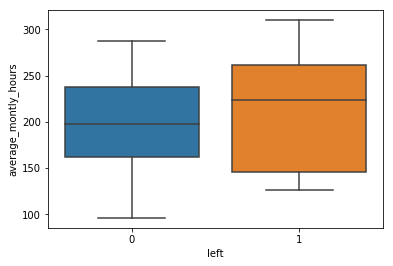

In [10]:
sns.boxplot(train.left,train.average_montly_hours)

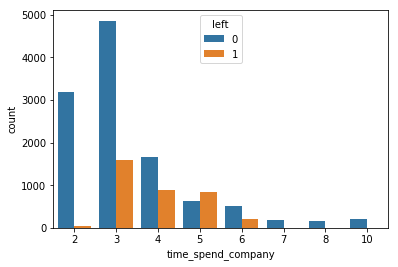

In [11]:
sns.countplot(x=train.time_spend_company,hue=train.left)

In [12]:
data=train[['Work_accident','promotion_last_5years','left']].copy()
data['Work_accident']=[str(val) for val in data.Work_accident]
data['promotion_last_5years']=[str(val) for val in data.promotion_last_5years]
data['left']=[str(val) for val in data.left]

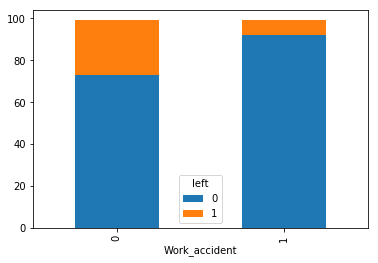

In [25]:
x=data.groupby(['Work_accident','left']).size()
count=data.Work_accident.value_counts()
for index in count.index:
    x[index][0]=x[index][0]/count[index]*100
    x[index][1]=x[index][1]/count[index]*100
x.unstack().plot(kind='bar',stacked=True)
#frequency distribution 

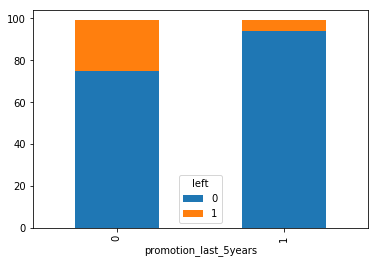

In [26]:
x=data.groupby(['promotion_last_5years','left']).size()
count=data.promotion_last_5years.value_counts()
for index in count.index:
    x[index][0]=x[index][0]/count[index]*100
    x[index][1]=x[index][1]/count[index]*100
x.unstack().plot(kind='bar',stacked=True)

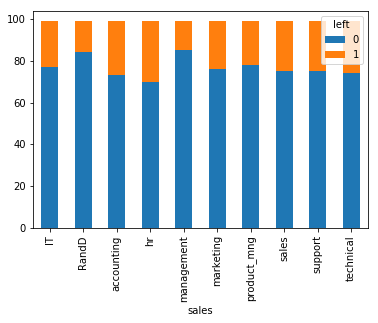

In [27]:
x=train.groupby(['sales','left']).size()
count=train['sales'].value_counts()
for index in count.index:
    x[index][0]=x[index][0]/count[index]*100
    x[index][1]=x[index][1]/count[index]*100
x.unstack().plot(kind='bar',stacked=True)

#sales doesnot seems to be a good feature

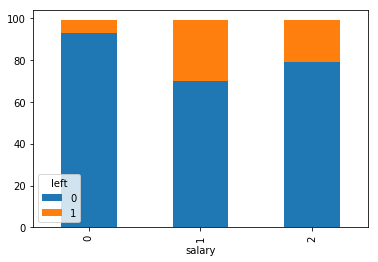

In [31]:
x=train.groupby(['salary','left']).size()
count=train['salary'].value_counts()
for index in count.index:
    x[index][0]=x[index][0]/count[index]*100
    x[index][1]=x[index][1]/count[index]*100
x.unstack().plot(kind='bar',stacked=True)


In [17]:
col=list(train.columns)
col.remove('left')
col.remove('sales')

In [18]:
le=LabelEncoder()
train['salary']=le.fit_transform(train['salary'])

In [19]:
train_x,test_x,train_y,test_y=train_test_split(train[col],train['left'],test_size=0.20,random_state=1)

In [30]:
logReg=LogisticRegression()
logReg.fit(train_x,train_y)
print('train score:',logReg.score(train_x,train_y))
print('test score:',logReg.score(test_x,test_y))

train score: 0.7652304358696558
test score: 0.7683333333333333


In [21]:
print(classification_report(logReg.predict(test_x),test_y))

             precision    recall  f1-score   support

          0       0.92      0.80      0.86      2634
          1       0.27      0.52      0.36       366

avg / total       0.84      0.77      0.80      3000



In [22]:
print(confusion_matrix(logReg.predict(test_x),test_y))

[[2113  521]
 [ 174  192]]


###### Logistic Regression is not performing upto the mark . Let's try SVM

In [89]:
from sklearn import svm

In [90]:
svc=svm.SVC()

In [91]:
svc.fit(train_x,train_y)
print('train score:',svc.score(train_x,train_y))
print('test score:',svc.score(test_x,test_y))

train score: 0.9613301108425703
test score: 0.9496666666666667


In [93]:
predicted_class=svc.predict(test_x)

In [94]:
print(classification_report(predicted_class,test_y))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2248
          1       0.92      0.87      0.90       752

avg / total       0.95      0.95      0.95      3000



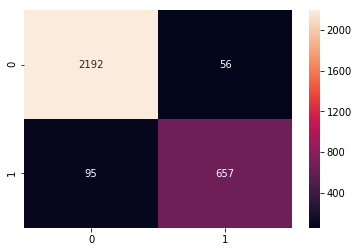

In [98]:
sns.heatmap(confusion_matrix(predicted_class,test_y),annot=True,fmt='.5g')

###### So, we are getting 96% accuracy on train data and 95% accuracy on test data 